<a href="https://colab.research.google.com/github/MartinMarzi/IPMdecisions/blob/main/IPMdecisions_DataExploration_colab_1_4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For colab
%pip install umap-learn
%pip install hdbscan

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pandas.api.types import CategoricalDtype
import umap
import hdbscan
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [125]:
#DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"
DATA_FILE = "https://kt-cloud.ijs.si/index.php/s/zyLj9jkFQFqJfoQ/download"

In [126]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows= range(150,155))

In [127]:
# Show data size
df.shape

(149, 81)

In [128]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", 30)

In [129]:
df.head()

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,3.0,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 81 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       149 non-null    object 
 1   Country                                      149 non-null    object 
 2   Subject                                      149 non-null    object 
 3   Age_Cat                                      149 non-null    int64  
 4   Gender_1male                                 148 non-null    float64
 5   Degree_Cat                                   144 non-null    float64
 6   Farm_size_Cat                                148 non-null    float64
 7   ProductionUse_selling                        117 non-null    float64
 8   Farm_type_Conventional                       116 non-null    float64
 9   Farm_type_Intergrated                        116 non-null    float64
 10  Fa

In [131]:
# Remove Greek instances
# Greek_index = df.loc[df.Country == "Greece"].index
# df_noGreek = df.drop(Greek_index, axis=0)
# df_noGreek

In [132]:
# Remove duplicate features and "Subject" feature.
dup_feat = ["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"] 
df_reduced = df.drop(dup_feat, axis=1)

In [133]:
df_reduced.shape

(149, 58)

In [134]:
# Remove feature specific to Question #2 "How_do_you_access_DSS_Cat"
removed_featuresQ2 = ["Region", "Country", "ProductionUse_selling", "Farm_type_Conventional", "Farm_type_Intergrated", "Farm_type_Organic",
             "Farm_type_Biodynamic", "Proportion_of_income", "Production_level_1to3", "Crop_Group_Cat", "Own_phone", "Years_own_phone", 
             "Use_DSS_App", "Agricultural_app_use_Cat", "Potencial_user_of_platform", "Prefered_access_Phone", "Prefered_access_PC", "Prefered_access_Advisor",
             "Prefered_type_Web_1", "Prefered_type_Software_2", "Importance_of_efficient_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3",
             "Trust_advice_friend_1to3", "DSS_can_improve_your_productivity_Cat", "CL_Output_preference_Graphical_1", "CL_Output_preference_Textual_2",
             "CL_Output_preference_Both_3", "Use_DSS_from_trusted_sources_Always", "Use_same_DSS_than_advisor_Cat", "Age_of_DSS_user_at_the_farm_1", 
             "Age_of_DSS_user_at_the_farm_2", "Age_of_DSS_user_at_the_farm_3", "Marketing_info_about_DSS_Cat", "Already_used_DSS", 
             "DSS_are_more_suited_for_ShortTermDecision_1", "DSS_are_more_suited_for_LongTermDecision_2"]
df_reducedQ2 = df_reduced.copy().drop(removed_featuresQ2, axis=1)

In [135]:
df_reducedQ2.shape

(149, 21)

In [136]:
df_reducedQ2.head()

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,Income_Cat,Legislative_requirements,Computer_at_home,Speed_internet_Cat,How_do_you_access_DSS_Cat,Willing_to_try_new_products_Cat,Price_important_factor,Importance_of_easy_to_use_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Need_IT_teaching_Cat,Share_DSS_exp_with_colleague_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Manufacturer_demo_of_DSS_Cat
0,4,1.0,1.0,5.0,NaN,1.0,1,3,1.0,2.0,0.0,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,1.0,1.0
1,4,1.0,2.0,4.0,2.0,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,1.0,2.0,2.0
2,2,1.0,2.0,5.0,2.0,1.0,1,2,1.0,1.0,1.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
3,2,1.0,2.0,4.0,5.0,1.0,1,2,1.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,NaN,3.0,2.0,1.0
4,2,1.0,2.0,5.0,5.0,1.0,1,2,3.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0


In [119]:
# One hot encode categorical data.
#ohe_df = pd.get_dummies(df, columns=["Region", "Country"])
ohe_df = pd.get_dummies(df_reducedQ2, columns=["Region"])

KeyError: ignored

### Missing values

In [120]:
# Show Missing values
ohe_df.isnull().sum()

Age_Cat                                    0
Gender_1male                               1
Degree_Cat                                 5
Farm_size_Cat                              1
Income_Cat                                 5
Legislative_requirements                  11
Computer_at_home                           0
Speed_internet_Cat                         0
How_do_you_access_DSS_Cat                 15
Willing_to_try_new_products_Cat            6
Price_important_factor                     3
Importance_of_easy_to_use_1to3             9
Importance_low_price_1to3                 13
Importance_polyvalence_1to3               13
Enjoy_using_new_techs_1to3                 2
Appreciate_change_1to3                     1
Need_IT_teaching_Cat                       2
Share_DSS_exp_with_colleague_Cat          13
WTP_for_DSS_Cat                            3
DSS_must_be_tailored_for_your_farm_Cat     3
Manufacturer_demo_of_DSS_Cat               6
Region_central_EU                          0
Region_nor

In [139]:
#df_noNaN = ohe_df.dropna(how="any").copy()
#df_noNaN = ohe_df.copy().fillna(ohe_df.mean())
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
df_noNaN = df_reducedQ2.dropna(how="any").copy()

# try scikit learn

In [140]:
df_noNaN.isnull().sum()

Age_Cat                                   0
Gender_1male                              0
Degree_Cat                                0
Farm_size_Cat                             0
Income_Cat                                0
Legislative_requirements                  0
Computer_at_home                          0
Speed_internet_Cat                        0
How_do_you_access_DSS_Cat                 0
Willing_to_try_new_products_Cat           0
Price_important_factor                    0
Importance_of_easy_to_use_1to3            0
Importance_low_price_1to3                 0
Importance_polyvalence_1to3               0
Enjoy_using_new_techs_1to3                0
Appreciate_change_1to3                    0
Need_IT_teaching_Cat                      0
Share_DSS_exp_with_colleague_Cat          0
WTP_for_DSS_Cat                           0
DSS_must_be_tailored_for_your_farm_Cat    0
Manufacturer_demo_of_DSS_Cat              0
dtype: int64

In [141]:
df_noNaN.shape

(95, 21)

In [142]:
df_noNaN.dtypes

Age_Cat                                     int64
Gender_1male                              float64
Degree_Cat                                float64
Farm_size_Cat                             float64
Income_Cat                                float64
Legislative_requirements                  float64
Computer_at_home                            int64
Speed_internet_Cat                          int64
How_do_you_access_DSS_Cat                 float64
Willing_to_try_new_products_Cat           float64
Price_important_factor                    float64
Importance_of_easy_to_use_1to3            float64
Importance_low_price_1to3                 float64
Importance_polyvalence_1to3               float64
Enjoy_using_new_techs_1to3                float64
Appreciate_change_1to3                    float64
Need_IT_teaching_Cat                      float64
Share_DSS_exp_with_colleague_Cat          float64
WTP_for_DSS_Cat                           float64
DSS_must_be_tailored_for_your_farm_Cat    float64


In [143]:
df_noNaN = df_noNaN.astype("int64")
df_noNaN

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,Income_Cat,Legislative_requirements,Computer_at_home,Speed_internet_Cat,How_do_you_access_DSS_Cat,Willing_to_try_new_products_Cat,Price_important_factor,Importance_of_easy_to_use_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Need_IT_teaching_Cat,Share_DSS_exp_with_colleague_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Manufacturer_demo_of_DSS_Cat
2,2,1,2,5,2,1,1,2,1,1,1,3,2,3,1,1,2,1,2,2,2
4,2,1,2,5,5,1,1,2,3,1,1,3,1,2,2,1,2,3,3,2,2
5,1,1,2,2,1,0,1,3,2,2,1,3,3,3,2,2,1,2,2,3,2
6,1,1,2,3,1,0,1,2,2,2,1,2,2,2,3,2,2,2,2,1,1
7,2,1,4,5,2,0,1,3,3,2,1,3,2,1,3,2,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,4,1,2,5,2,1,1,1,3,2,1,3,1,2,2,2,2,2,3,3,2
128,1,1,2,1,1,0,1,2,2,1,1,2,2,2,2,2,2,1,2,2,2
135,3,1,2,3,3,0,1,2,3,1,1,2,1,2,1,1,2,2,2,1,1
137,1,1,1,5,4,0,1,3,2,1,0,1,1,2,2,1,2,1,3,2,2


In [144]:
df_noNaN.dtypes

Age_Cat                                   int64
Gender_1male                              int64
Degree_Cat                                int64
Farm_size_Cat                             int64
Income_Cat                                int64
Legislative_requirements                  int64
Computer_at_home                          int64
Speed_internet_Cat                        int64
How_do_you_access_DSS_Cat                 int64
Willing_to_try_new_products_Cat           int64
Price_important_factor                    int64
Importance_of_easy_to_use_1to3            int64
Importance_low_price_1to3                 int64
Importance_polyvalence_1to3               int64
Enjoy_using_new_techs_1to3                int64
Appreciate_change_1to3                    int64
Need_IT_teaching_Cat                      int64
Share_DSS_exp_with_colleague_Cat          int64
WTP_for_DSS_Cat                           int64
DSS_must_be_tailored_for_your_farm_Cat    int64
Manufacturer_demo_of_DSS_Cat            

### Changing data types to categorical (ordinal) and separating dataframes

In [74]:
"""
# Make CategoricalDtype parameter for ordered features.
oct = CategoricalDtype(ordered=True) 

# Make df with all unordered categorical data
uo_cat_df = ohe_df.astype("category")

# Make final cat_df with unordered and ordered categorical features and two numeric features
cat_df = uo_cat_df
cat_df[num_feat] = cat_df[num_feat].astype("float64")

# {name: oct for name in ord_feat}
cat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,
                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, 
                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, 
                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_teaching_Cat":oct,
                        "DSS_must_be_tailored_for_your_farm_Cat":oct, "Marketing_info_about_DSS_Cat":oct
                       })
"""

'\n# Make CategoricalDtype parameter for ordered features.\noct = CategoricalDtype(ordered=True) \n\n# Make df with all unordered categorical data\nuo_cat_df = ohe_df.astype("category")\n\n# Make final cat_df with unordered and ordered categorical features and two numeric features\ncat_df = uo_cat_df\ncat_df[num_feat] = cat_df[num_feat].astype("float64")\n\n# {name: oct for name in ord_feat}\ncat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,\n                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, \n                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, \n                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_t

In [75]:
# # List of ordinal features
# ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
#             "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
#             "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
#             "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
#             "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat"]

# # List of numeric features
# num_feat = ["Years_own_phone", "Proportion_of_income"]

# # nom_feat = []

In [145]:
# Adapted for Question #2 "How do you access DSS"
# List of ordinal features
old_ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
            "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
            "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
            "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
            "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat", "Manufacturer_demo_of_DSS_Cat"]

ord_feat = [_ for _ in old_ord_feat if _ not in removed_featuresQ2]
ord_feat

# No numeric features
#num_feat = ["Years_own_phone", "Proportion_of_income"]

nom_feat = []

In [146]:
# df with ordinal and numeric featureas only
#ordnum_df = pd.concat([df_noNaN[ord_feat], df_noNaN[num_feat]], axis=1).copy()
ordnum_df = df_noNaN[ord_feat]

# Extract column names
all_col_names = list(df_noNaN.columns)
ordnum_col_names = list(ordnum_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ordnum_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only (all but two ("Crop_Group_Cat" and "Willing_to_try_new_products_Cat") are binary)
# binarizarja ta dva
nom_df = df_noNaN[nom_col_names]

# Dimensionality reduction

### Ordinal and numeric features

Text(0.5, 1.0, 'UMAP projection of ordinal IPM farmers data')

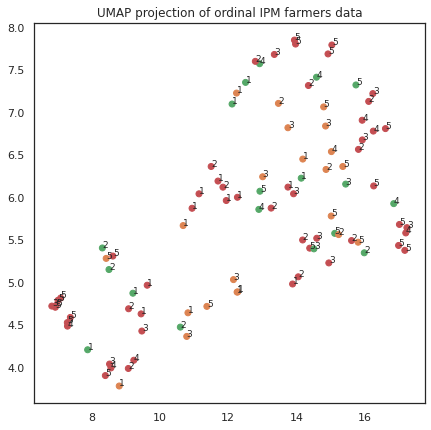

In [147]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ordnum_df)
scaled_df = pd.DataFrame(scaled_array, columns=ordnum_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=4, min_dist=0.1, n_components=2, metric="chebyshev", random_state=123)
ord_embedding = reducer.fit_transform(scaled_df)

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ordnum_df['How_do_you_access_DSS_Cat']])

for i, val in enumerate(df_noNaN["Income_Cat"].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of ordinal IPM farmers data')

### Nominal features

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



Text(0.5, 1.0, 'UMAP projection of nominal IPM farmers data')

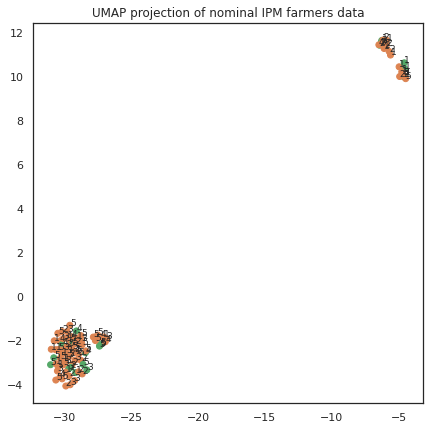

In [148]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, metric="dice", random_state=123)
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in nom_df['Willing_to_try_new_products_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of nominal IPM farmers data')

# naredi for loop da odstranjaš posamično atribute

### Combine nominal and ordinal/numeric feature maps

In [80]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

Text(0.5, 1.0, 'UMAP projection of IPM farmers intersection data')

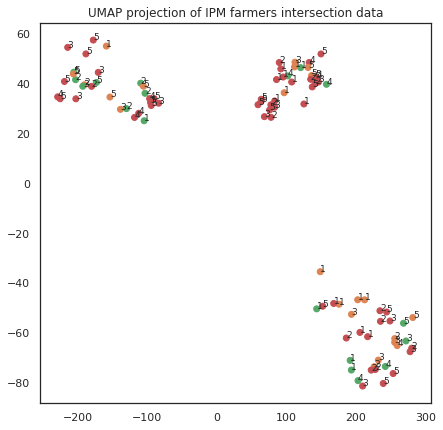

In [81]:
# plot intersection 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['How_do_you_access_DSS_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers intersection data')

Text(0.5, 1.0, 'UMAP projection of IPM farmers union data')

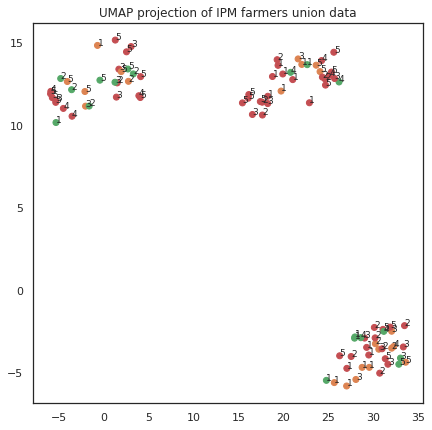

In [82]:
# plot union 2D embedding
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['How_do_you_access_DSS_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM farmers union data')

# CLUSTERING

Probaj clustering brez dim reduction

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM farmers intersection data')

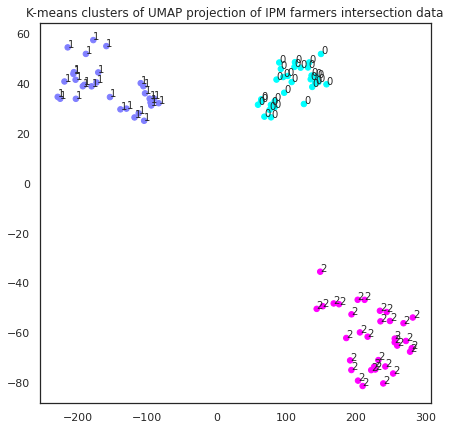

In [83]:
# k-means clustering 2D intersection emnbedding
km_inters_clusters = cluster.KMeans(n_clusters=3).fit_predict(intersection_embedding)

# plot
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=km_inters_clusters, s=30, cmap='cool')

# Add cluster text
for i, val in enumerate(km_inters_clusters.tolist()):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=10)
plt.title('K-means clusters of UMAP projection of IPM farmers intersection data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM farmers intersection data')

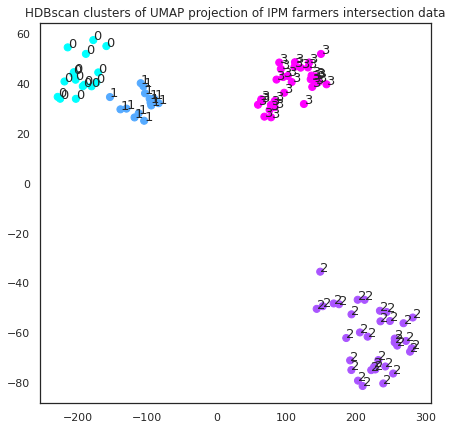

In [84]:
# hdbscan clustering 2D intersection emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, min_samples=2)
hdbscan_inters_clusters = clusterer.fit_predict(intersection_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_inters_clusters >= 0)
ax.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_inters_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_inters_clusters):
    ax.annotate(str(int(val)), (intersection_embedding[:, 0][i], intersection_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers intersection data')

Text(0.5, 1.0, 'K-means clusters of UMAP projection of IPM farmers union data')

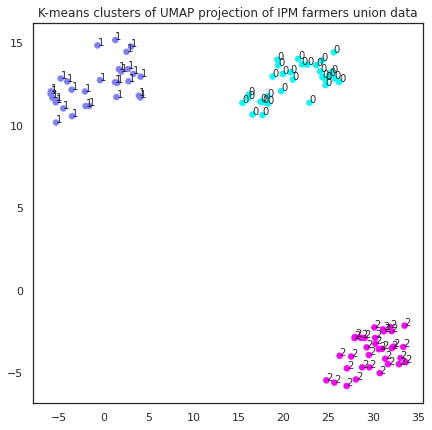

In [85]:
# kmeans clustering 2D union emnbedding
km_union_clusters = cluster.KMeans(n_clusters=3).fit_predict(union_embedding)
#kmeans_labels

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(union_embedding[:, 0], union_embedding[:, 1], c=km_union_clusters, s=30, cmap='cool')

# daj clustre (številke) gor v umap
for i, val in enumerate(km_union_clusters.tolist()):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=10)

plt.title('K-means clusters of UMAP projection of IPM farmers union data')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'HDBscan clusters of UMAP projection of IPM farmers union data')

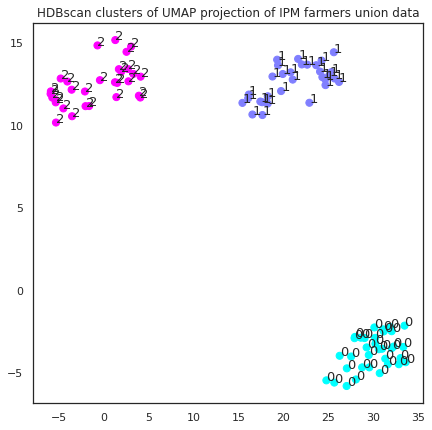

In [86]:
# hdbscan clustering 2D union emnbedding
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=4)
hdbscan_union_clusters = clusterer.fit_predict(union_embedding)

fig, ax = plt.subplots(figsize=(7,7))

clustered = (hdbscan_union_clusters >= 0)
ax.scatter(union_embedding[~clustered, 0],
            union_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=50,
            alpha=0.3)

ax.scatter(union_embedding[clustered, 0],
            union_embedding[clustered, 1],
            c=hdbscan_union_clusters[clustered],
            s=50,
            cmap='cool')

for i, val in enumerate(hdbscan_union_clusters):
    ax.annotate(str(int(val)), (union_embedding[:, 0][i], union_embedding[:, 1][i]), fontsize=13)

plt.title('HDBscan clusters of UMAP projection of IPM farmers union data')

## Interactive 3D Visualisation

In [87]:
# 3D embedding
ord_reducer3d = umap.UMAP(n_neighbors=8, min_dist=0.1, n_components=3, metric="euclidean", random_state=123)
ord_embedding3d = ord_reducer3d.fit_transform(ordnum_df)

nom_reducer3d = umap.UMAP(n_neighbors=8, min_dist=0.1, n_components=3, metric="dice", random_state=123)
nom_embedding3d = nom_reducer3d.fit_transform(nom_df)

# combine mappings
intersection_embedding3d = nom_embedding3d * ord_embedding3d
union_embedding3d = nom_embedding3d + ord_embedding3d

# hdbscan
intersection_clusters = hdbscan.HDBSCAN(min_samples=15, min_cluster_size=10).fit_predict(intersection_embedding3d)
union_clusters = hdbscan.HDBSCAN(min_samples=15, min_cluster_size=10).fit_predict(union_embedding3d)
print("intersection_clusters :", intersection_clusters)
print("union_clusters :", union_clusters)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



intersection_clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0]
union_clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 0]


### Plotly visualisation

In [88]:
# 3D dataframes
intersection3d_df = pd.DataFrame(data=intersection_embedding3d, columns=["x", "y", "z"])
intersection3d_df["clusters"] = list(map(str, intersection_clusters))
union3d_df = pd.DataFrame(data=union_embedding3d, columns=["x", "y", "z"])
union3d_df["clusters"] = list(map(str, union_clusters))

In [89]:
# Intersection embedding cluster visualisation 
fig = px.scatter_3d(intersection3d_df, "x","y","z", color="clusters", text=df_noNaN["How_do_you_access_DSS_Cat"], opacity=0.8, 
                    title="Intersection 3D embedding of farmers IPM data")
fig.show()

In [90]:
fig.write_html("IPM_DataEmbedding_q2.html")

In [91]:
# Union embedding cluster visualisation 
fig = px.scatter_3d(union3d_df, "x","y","z", color="clusters", text=df_noNaN["How_do_you_access_DSS_Cat"], opacity=0.5, 
                    title="Union 3D embedding of farmers IPM data")
fig.write_html("/content/plotly1.html")
fig.show()

Validate clusters Which Metrics?

# Cluster explanation 

In [92]:
# DataFrame for classification with clusters from embedding3d
df_noNaN["clusters"] = intersection_clusters
df_clst = df_noNaN.copy()
df_clst

# use Weka and See5 (Quinlan) [moraš poklicat s !]
# https://colab.research.google.com/drive/1A9bZkPvXPAViipan7u9siQfkakChyYFV?usp=sharing#scrollTo=CgxRusBSCxrn

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,Income_Cat,Legislative_requirements,Computer_at_home,Speed_internet_Cat,How_do_you_access_DSS_Cat,Willing_to_try_new_products_Cat,Price_important_factor,Importance_of_easy_to_use_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Need_IT_teaching_Cat,Share_DSS_exp_with_colleague_Cat,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU,clusters
2,2,1,2,5,2,1,1,2,1,1,1,3,2,3,1,1,2,1,2,2,2,0,0,1,0
4,2,1,2,5,5,1,1,2,3,1,1,3,1,2,2,1,2,3,3,2,2,0,0,1,0
5,1,1,2,2,1,0,1,3,2,2,1,3,3,3,2,2,1,2,2,3,2,0,0,1,0
6,1,1,2,3,1,0,1,2,2,2,1,2,2,2,3,2,2,2,2,1,1,0,0,1,0
7,2,1,4,5,2,0,1,3,3,2,1,3,2,1,3,2,2,1,2,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,4,1,2,5,2,1,1,1,3,2,1,3,1,2,2,2,2,2,3,3,2,1,0,0,1
128,1,1,2,1,1,0,1,2,2,1,1,2,2,2,2,2,2,1,2,2,2,0,0,1,0
135,3,1,2,3,3,0,1,2,3,1,1,2,1,2,1,1,2,2,2,1,1,0,0,1,0
137,1,1,1,5,4,0,1,3,2,1,0,1,1,2,2,1,2,1,3,2,2,0,0,1,0


In [93]:
df_clst.to_csv("IPM_data&clusters_question2.csv")

## Modelling

[Text(468.72, 453.0, 'Region_south_EU <= 0.5\ngini = 0.666\nsamples = 95\nvalue = [34, 31, 30]\nclass = 0'),
 Text(312.48, 271.8, 'Region_north_EU <= 0.5\ngini = 0.5\nsamples = 61\nvalue = [0, 31, 30]\nclass = 1'),
 Text(156.24, 90.59999999999997, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = 1'),
 Text(468.72, 90.59999999999997, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]\nclass = 2'),
 Text(624.96, 271.8, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = 0')]

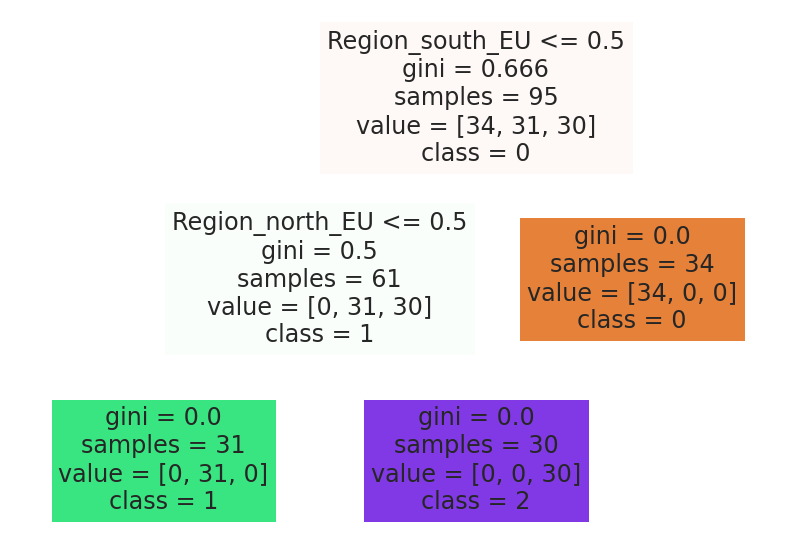

In [50]:
from sklearn import tree

target_class = "clusters"
X, y = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]], df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(_) for _ in [0,1,2,3]], filled=True) 

In [44]:
# Train the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target_class = "clusters"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
y = df_noNaN[target_class]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Predictions for test dataset
y_predict = model.predict(X_test)
y_predict

array([2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0,
       2, 0, 0, 1, 1, 2, 0, 2, 1, 2])

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)

target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = clf.fit(X, Y)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

|--- How_do_you_access_DSS_Cat <= 1.50
|   |--- class: 0
|--- How_do_you_access_DSS_Cat >  1.50
|   |--- class: 1



In [48]:
# """Ne morem importat, nek conflict
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("IPM") 
# """

# create dictionary with value mapping

In [49]:
# df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
# df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})